In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras import Sequential
import numpy as np
from keras import regularizers

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
print(tf.__version__)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2.2.0-rc2


Using TensorFlow backend.


In [0]:
ERP = pd.read_csv('../content/final_schizo.csv')

The number of trials for the fit class is: 98304
The number of trials for the schizoprenic class is: 150528


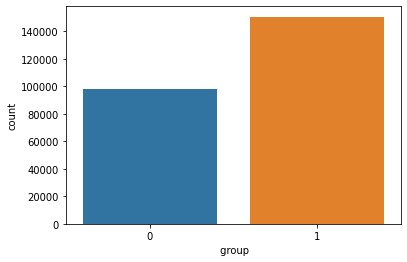

In [10]:
cols = ERP.columns
tgt = ERP[' group']
ax = sn.countplot(tgt,label="Count")
schizoprenic, fit = tgt.value_counts()
print('The number of trials for the fit class is:', fit)
print('The number of trials for the schizoprenic class is:', schizoprenic)


In [12]:
ERP.isnull().sum()


Unnamed: 0    0
subject       0
Fz            0
FCz           0
Cz            0
FC3           0
FC4           0
C3            0
C4            0
CP3           0
CP4           0
 group        0
dtype: int64

In [13]:
ERP.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  248832 non-null  int64  
 1   subject     248832 non-null  int64  
 2   Fz          248832 non-null  float64
 3   FCz         248832 non-null  float64
 4   Cz          248832 non-null  float64
 5   FC3         248832 non-null  float64
 6   FC4         248832 non-null  float64
 7   C3          248832 non-null  float64
 8   C4          248832 non-null  float64
 9   CP3         248832 non-null  float64
 10  CP4         248832 non-null  float64
 11   group      248832 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 22.8 MB


In [14]:
ERP.describe()


,Unnamed: 0,subject,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,group
count,248832.000000,248832.000000,248832.000000,248832.000000,248832.000000,248832.000000,248832.000000,248832.000000,248832.000000,248832.000000,248832.000000,248832.000000
mean,124415.500000,41.000000,0.548699,1.039918,1.253373,0.840808,0.513989,1.146055,0.579773,0.925381,0.518643,0.604938
std,71831.755429,23.380951,2.141285,2.366516,2.494080,2.059043,1.825502,2.227648,1.884145,2.225112,1.921775,0.488865
min,0.000000,1.000000,-9.238550,-9.176126,-11.313430,-9.714905,-9.437540,-7.977966,-10.623550,-8.570679,-11.704520,0.000000
25%,62207.750000,21.000000,-0.761931,-0.455954,-0.330233,-0.482438,-0.575475,-0.252759,-0.587142,-0.439472,-0.657320,0.000000
50%,124415.500000,41.000000,0.408099,0.796265,0.898430,0.584198,0.391141,0.870537,0.460987,0.747819,0.408181,1.000000
75%,186623.250000,61.000000,1.713991,2.321995,2.586085,1.991961,1.551555,2.388095,1.677817,2.195711,1.626807,1.000000
max,248831.000000,81.000000,22.861889,16.870169,14.813741,20.009208,18.866536,18.436541,16.277234,16.881090,13.735362,1.000000


In [20]:
X = ERP.iloc[:,1:11].values
X.shape

(248832, 10)

In [21]:
ERP

,Unnamed: 0,subject,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,group
0,0,1,1.857458,2.663352,3.051918,1.789011,1.961065,4.949901,2.282836,4.664762,3.425792,0
1,1,1,1.769692,2.601734,3.005648,1.868428,1.774454,5.024462,2.194537,4.737277,3.272531,0
2,2,1,1.764793,2.542194,3.002812,1.873400,1.800019,4.957654,2.152802,4.700508,3.171712,0
3,3,1,1.884980,2.632460,3.198821,1.987578,2.028194,5.091695,2.337921,4.914420,3.385077,0
4,4,1,1.591516,2.369464,2.965318,1.868979,1.853117,4.894329,2.262968,4.730303,3.335385,0
...,...,...,...,...,...,...,...,...,...,...,...,...
248827,248827,81,-0.401267,0.041014,-0.352556,0.712530,-0.427019,0.479170,1.041864,0.645761,-0.085649,1
248828,248828,81,-0.440294,0.093863,-0.422151,0.792209,-0.469230,0.486767,0.955658,0.601938,-0.264824,1
248829,248829,81,-0.466162,0.083799,-0.485091,0.799034,-0.466002,0.516740,0.972635,0.612470,-0.463196,1
248830,248830,81,-0.472620,0.003017,-0.465663,0.675452,-0.408777,0.558901,0.943028,0.635287,-0.656748,1


In [22]:
X[0]

array([1.        , 1.85745789, 2.66335158, 3.05191789, 1.78901053,
       1.96106526, 4.94990105, 2.28283579, 4.66476211, 3.42579158])

In [27]:
y = ERP.iloc[:,11].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train.shape

(199065, 10)

In [0]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [72]:
model_m = keras.Sequential()
model_m.add(keras.layers.Conv1D(80, 1, activation='relu', strides=10,input_shape=(None, 10), kernel_initializer= 'uniform'))
model_m.add(keras.layers.GlobalAveragePooling1D())
model_m.add(keras.layers.Dropout(0.5))
model_m.add(keras.layers.Dense(2, activation='softmax'))
print(model_m.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, None, 80)          880       
_________________________________________________________________
global_average_pooling1d_17  (None, 80)                0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 80)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                 162       
Total params: 1,042
Trainable params: 1,042
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
model_m.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['accuracy'])
history = model_m.fit(trainX,
                      y_train,
                      batch_size=300,
                      epochs=100,
                      
                      verbose=2)

Epoch 1/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.5044
Epoch 2/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.4933
Epoch 3/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.5016
Epoch 4/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.5020
Epoch 5/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.4968
Epoch 6/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.5024
Epoch 7/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.5006
Epoch 8/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.5011
Epoch 9/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.4993
Epoch 10/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.4998
Epoch 11/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.5047
Epoch 12/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.5003
Epoch 13/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.5042
Epoch 14/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.5001
Epoch 15/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.4961
Epoch 16/100
664/664 - 1s - loss: 0.6931 - accuracy: 0.4976
Epoch 17/100
664/664 - 1s - loss: 0.6931 - accura

In [83]:

# y_pred = classifier.predict(X_test, verbose =0)
# y_pred = (y_pred > 0.5)
yhat_probs = model_m.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model_m.predict_classes(testX, verbose=0)
yhat_probs = yhat_probs[:, 0]
# yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print(matrix)

Accuracy: 0.836177
Precision: 0.790635
Recall: 0.991148
F1 score: 0.879609
Cohens kappa: 0.633218
ROC AUC: 0.170839
[[11830  7887]
 [  266 29784]]
